![Adelie penguins in the South Shetland Islands](https://upload.wikimedia.org/wikipedia/commons/4/47/South_Shetland_Islands-banner.jpg)


 # Investigation of the Palmer Penguins Dataset
Author: Myles Henehan
 ***

## Background

The origins of the Palmer Penguins dataset can be traced back to the work of Dr. Kristen Gorman and the Palmer Station, a research facility operated by the United States Antarctic Program (USAP). The data contained within this set pertains to the characteristics and species of penguins living on islands around the Palmer Archipelago in the Antarctic. As an open and freely accessible source, this dataset is commonly used by students starting out in the field of data analytics, as it allows them to practice data manipulation using real-life examples. Its manageable size and mix of variable types enable us to gain an insight into what we can achieve with data in Python, utilizing libraries like Pandas, NumPy, and Matplotlib to aid our analysis.

## Structure of the Palmer Penguins Data Set

The Palmer Penguins dataset contains 334 rows, each representing an individual penguin observed in the region. There are 7 columns, otherwise known as 'data series', each representing a different characteristic or variable pertaining to the individual penguin. The variables comprise the species of the individual, the island on which it was observed, the sex of the penguin, and a number of physical attributes, including bill length, bill depth, flipper length, and body mass.

## Identifying the variable types useful for analysis

Looking at the variables outlined above, it is clear that there are two main variable types for consideration in this data set: categorical and numerical.

Categorical variables represent qualitative attributes: in other words, information that describes qualities or characteristics, rather than quantities or numerical values. In the case of this data set, Species, Island and Sex would be considered the 3 categorical values. Unlike numerical variables, which can reach an infinite number, categorical variables are typically finite. For example, while we can't say for sure that there aren't any examples of intersex penguins in the Antarctic, the vast majority of penguins surveyed will fit into the category of either Male or Female. Similarly, there is only a certain number of islands that have been surveyed and a certain number of species that scientists in the region are aware of.

Numerical variables, on the other hand, represent quantitative attributes, that can be counted, compared, and subjected to mathematical operations. In this data set, we have 4 such variables: bill length, bill depth, flipper length and body mass. Unlike with categorical variables, there is undoubtedly an infinite number of values that we can have. For example, no two penguins are likely to have the exact same flipper length. Perhaps, by rounding up to an integer you could equate them, but looking at individual float values, there is always going to be some margin of variation, even if that is only 10^{-5} of a milimetre.

## Libraries

Before beginning any sort of exploration of the data, we first need to import our essential libraries.

Firstly, we will import Pandas, an open-source Python library used for data manipulation and analysis. Since this Python library is geared towards tabular data, it is a perfect tool to explore the data set and visualise it in a logical way. 

We will also need to import Matplotlib to produce suitable plots of the variables within the set. The benefit of this plotting library is that it is highly customisable, allowing us to have greater control over our plots.

Finally, we will need to import NumPy to help us get the best fit line.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Looking at the data
Let's make a start by reading in the Palmer Penguins data set from a csv file, available as a public source on [GitHub](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv).



In [2]:
df_unclean = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv") #Here, df stands for "Data Frame". The function pd.read_csv allows us to read a csv file and call it df.
df = df_unclean.dropna() # Later on, when looking at correlations, I experienced some issues with the data set, due to a few NaN values. 
# In order to avoid this, I have cleaned up the data set before starting to run any code, using the dropna function (OpenAI, 2024).

Now let's get a quick preview of how the data set looks in order to know what we are working with and choose some variables that look interesting.

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Plotting a variable on a Bar Chart

Since bar charts are mainly suited to categorical data, let's try to visualise the counts of each penguin species.

In [4]:
# First, we count the number of penguins of each species using the function below. 
PenguinSpecies = df['species'].value_counts()
# Now let's print it so We have an idea of what we're going to see in the plot.
PenguinSpecies

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

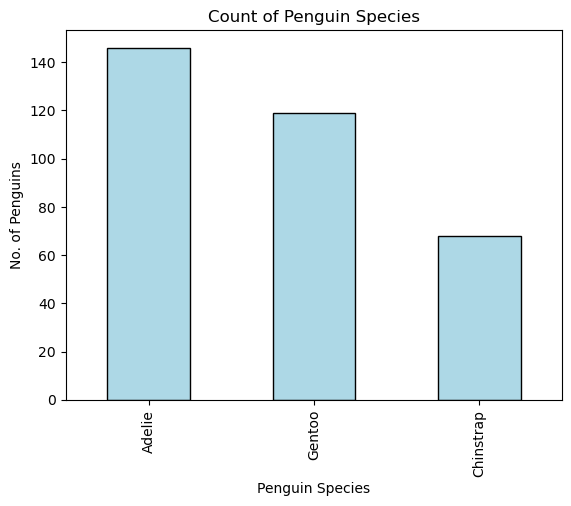

In [5]:
PenguinSpecies.plot(kind='bar', color='lightblue', edgecolor='black') # this function plots a bar chart of the counts of penguin species, using species for the x axis and the count for the y axis.
plt.xlabel('Penguin Species')
plt.ylabel('No. of Penguins')
plt.title('Count of Penguin Species')
#Added labels and a title
plt.show()

As we can see from the bar chart, the Adelie species of penguin is seemingly the most common around these islands, with around 152 individual penguins observed. Meanwhile, the Chinstrap is the rarest, with only 68 identified. As you can see, this type of plot offers a visually pleasing way of dealing with relatively simple categorical data, where you just want to look at the number of instances within a category.

## Plotting a variable on a Histogram

While a bar chart is a useful way of representing categorical data, it does have its limitations when it comes to numerical data. Let's take Body Mass as an example - With 344 rows of data, a bar chart would have to display a bar for each individual value, leading to a cluttered and overwhelming visual. This dense representation of data would it difficult to discern patterns, trends, or distributions within the dataset. Additionally, the sheer number of bars can obscure any meaningful insights that may exist within the data.

Let's first see how many unique values we have for body mass:

There are 93 different unique values here, so if we were to try to represent this in a bar chart, we would end up with something like this:

<Axes: xlabel='body_mass_g'>

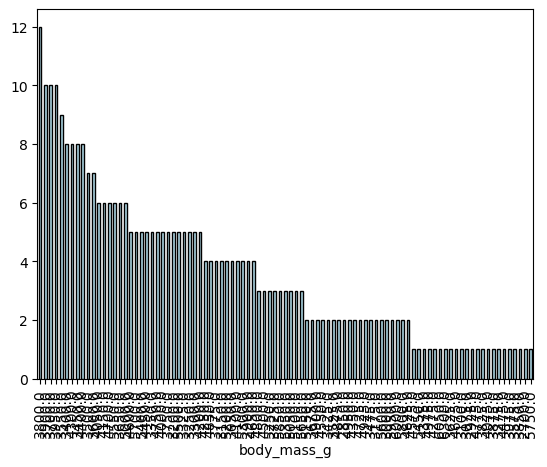

In [7]:
BodyMass.plot(kind='bar', color='lightblue', edgecolor='black')

As evident, the dataset contains numerous distinct values, with the most frequent occurring only 12 times, and many occurring only once. Consequently, this plot lacks significant meaning due to the sparse distribution of values.

To get a better view of the data, we need to use a histogram. The advantage of this plot type is that when it comes to continuous variables, such as floats, a histogram will divide the values into ranges known as bins, thus breaking the data into more meaningful chunks. This helps in identifying patterns, central tendencies, and the spread of the data.

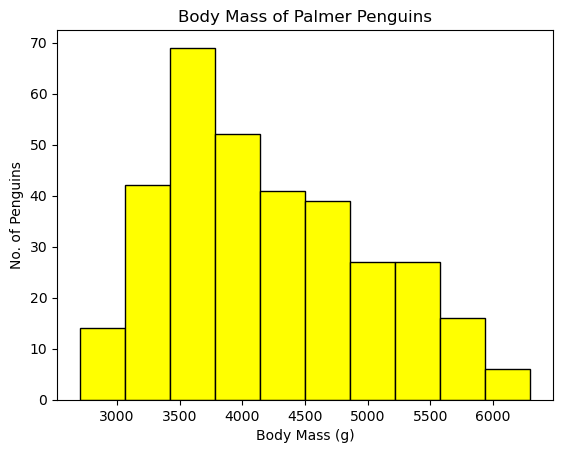

In [8]:
plt.hist(df['body_mass_g'], bins=10, color='yellow', edgecolor='black')
plt.xlabel('Body Mass (g)')
plt.ylabel('No. of Penguins')
plt.title('Body Mass of Palmer Penguins')
plt.show()


Placeholder: Explain data.

# Analysis of the Correlation between Two Variables


Variables in a dataset provide individual pieces of information, but their true significance is often only revealed when we examine how they relate to each other. This is where the concept of correlation comes into play. Correlation measures the strength and direction of the relationship between two variables, and using correlation analysis, we can discern patterns, dependencies, and even causality between different aspects of data.

Here, I am interested in the correlation between bill length and bill depth. My assumption is that the longer a penguin's bill is, the deeper it will be. In biology, this is known as "allometric scaling" where as animals grow larger, their proportions tend to remain consistent. As such, I expect to see a clean linear progression.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" alt="Drawing" style="width: 550px;"/>

Artwork by @allison_horst

## Creating a Scatter Plot

One of the most effective ways to visualise variables and their correlation is through a scatter splot. 
Let's have a look at these variables first:

In [9]:
billdepth = df['bill_depth_mm'] # We're going to start by assigning the data series in the data frame, bill_depth_mm, to the variable billdepth
billdepth = billdepth.to_numpy() # Let's convert this to a NumPy array to make it easier to work with:
billlen = df['bill_length_mm'] # Now, let's do the same 2 steps with the bill length
billlen = billlen.to_numpy()


Once we've done this, we are ready to create a scatter plot using these arrays.

Text(0.5, 1.0, 'Correlation between Bill Depth and Bill Length')

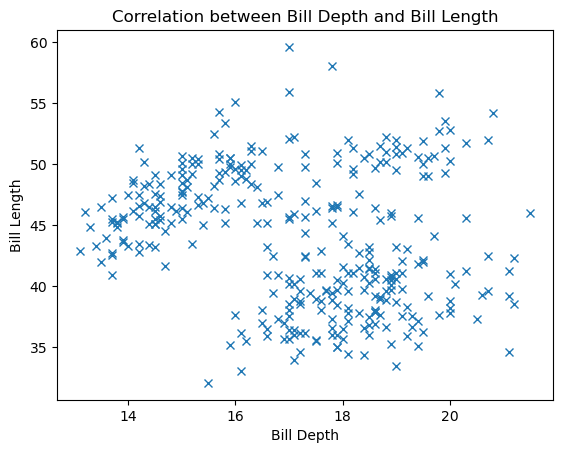

In [22]:
fig, ax = plt.subplots() # We start by creating a new figure and set of axes (stateless approach), where fig is the overall figure and ax is the set of axes on this figure (just one in this case).


ax.plot(billdepth, billlen, 'x') # Let's use a function to create a new plot. Then we'll add our labels and a title.
ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')
ax.set_title('Correlation between Bill Depth and Bill Length')

# We could also use the ax.set_xlim() and ax.set_ylim() functions here if we wanted to change the limits of the axes, but in this case, we'll use the ones given.
# If working in a .py file, it would be necessary to use the fig.show() function, but jupyter notebooks show the plots automatically.

Examining this scatter plot, it's difficult to see a discernible correlation - positive or negative. Instead, what emerges are distinct clusters of data points. This prompts the question as to whether these clusters are attributable to the presence of multiple penguin species in our dataset, each potentially exhibiting unique correlations in bill measurements. However, further exploration into this possibility is warranted, which we'll delve into later on.

## Adding a Best Fit Line
***

In order to visualise the correlation between these 2 variables, one of the best ways is by inserting a Best Fit line. 

See below:

In [29]:
# uses the y = mx + c method

m, c = np.polyfit(billdepth, billlen, 1)

m, c # Here, "m" represents the slope, while "c" represents the intercept of the line.


(-0.6349051704195006, 54.89085424504751)

Now we map it onto our plot as a 'best fit" line and we can clearly see the downward slope of the line, signifying a negative correlation.

Text(0, 0.5, 'Bill Length')

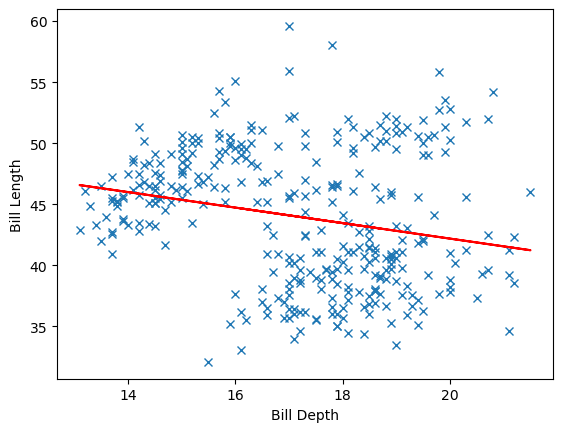

In [28]:
fig, ax = plt.subplots()
ax.plot(billdepth, billlen, 'x')

ax.plot(billdepth, m * billdepth + c, 'r-') #This time we're adding another plot command to insert our best fit line, with "r-" represents the red line.
ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')

## Pearson's Coefficient

Another way to measure the correlation between these two variables would be to look at the Pearson's coefficient. This method measures the extent to which the points in a scatter plot cluster around a straight line, and is widely used in statistics and data analysis to assess the relationship between two continuous variables.

In [39]:
slope = -0.6349051704195006
intercept = 54.89085424504751

predicted_y = (slope * billdepth) + (intercept)

# Calculate Pearson correlation coefficient
correlation_matrix = np.corrcoef(predicted_y, billlen)
r = correlation_matrix[0, 1]

print("r=", r)


r= 0.2286256359130289


As you can see above, the Pearson's correlation coefficient is 0.2286256359130289. According to the literature, this coefficient, can range between 0 and 1, with 0 implying no correlation, 1 implying a very positive correlation, and -1 implying a very negative correlation. The fact that the Pearson correlation coefficient is slightly positive, while the best fit line is slightly negative, it quite unusual, though not impossible. 

In [35]:
bill_depth = df['bill_depth_mm']
bill_length = df['bill_length_mm']

# Calculate Pearson correlation coefficient
pearson_corr = bill_depth.corr(bill_length)

print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: -0.22862563591302923


## Additional Exploration

Going back to my theory above, I would like to see if this negative correlation is due to the inclusion of multiple species of penguin in the same analysis.

So let's take a look on an individual species level. To do this, we're going to need to add another variable to our plot.

In [13]:
species = df['species'] # Again, we'll convert it to a NumPy array to make it easier to work with.
species = species.to_numpy()

Now that we have a NumPy array for species, we can create a scatter plot for all 3 variables, using colour to differentiate between species.

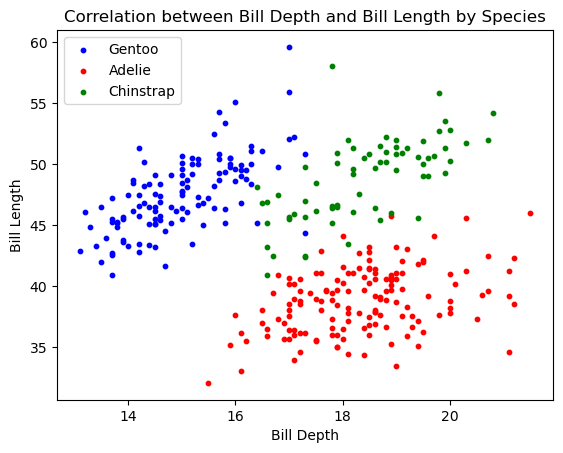

In [27]:
fig, ax = plt.subplots()

colors = {'Adelie': 'red', 'Chinstrap': 'green', 'Gentoo': 'blue'}


for s in set(species):
    ax.scatter(billdepth[species == s], billlen[species == s], 
                c=colors[s], label=s, s=10)
    
ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')
ax.set_title('Correlation between Bill Depth and Bill Length by Species')

ax.legend()

Even without drawing a best fit line here, we can see the correlation within each species skews more positive. This seems like a strange paradox considering the overall correlation skews negative. According to Horst et al (2022), the is known as "Simpson’s Paradox", whereby a trend observed between variables is reversed when data are pooled, omitting a meaningful variable". Undoubtedly, this emphasises the importance of considering potentially confounding variables in data analysis, as collecting data without considering subgroup differences can lead to false conclusions about the true nature of the relationship between variables. While this phenomenon has not been commonly found in real-life datasets, failure to recognise it can have serious consequences across many fields, including medical sciences and social statistics ().

## Conclusion

## References

##### Data set originally published in:

- Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

##### Other sources:
- Horst, A. et al. (2022). "Palmer Archipelago Penguins Data in the palmerpenguins R Package - An Alternative to Anderson's Irises". The R Journal. 14. 244-254. doi: 10.32614/RJ-2022-020. 
- Norton, H.J. and Divine, G. (2015). "Simpson's paradox ... and how to avoid it". Significance. 12 (4): 40–43. doi:10.1111/j.1740-9713.2015.00844.x.
- OpenAI. (2024). ChatGPT. OpenAI. Available at: https://openai.com/chatgpt (Accessed: April 29, 2024).


##### Images and Media:
- ravas51.(14 May 2013). "Adelie penguins in the South Shetland Islands". Wikimedia Commons. Available at: https://commons.wikimedia.org/wiki/File:South_Shetland_Islands-banner.jpg
- Horst, A. (2020). Culmen_depth. GitHub. Available at: https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/culmen_depth.png



# End